In [1]:
from experiment import PavlovTiming
from model import ValueRNN
from train import make_dataloader, train_model, probe_model
from plotting import plot_trials, plot_loss, plot_predictions, plot_hidden_activity

### Create Experiment

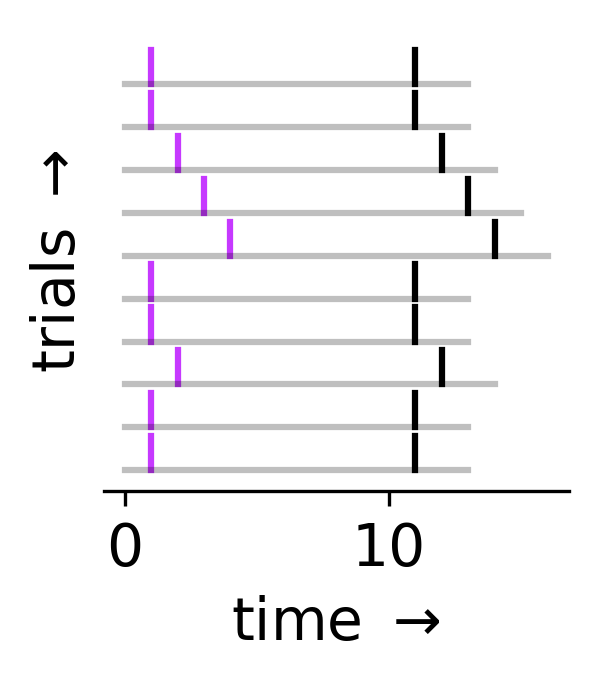

In [2]:
E = PavlovTiming(ncues=1)
plot_trials(E.trials[:10])

### Create Model

In [3]:
hidden_size = 2 # number of hidden neurons
gamma = 0.5     # discount rate
model = ValueRNN(input_size=E.ncues + int(E.include_reward),
                 output_size=7,
                 hidden_size=hidden_size, 
                 gamma=gamma)
print('model # parameters: {}'.format(model.n_parameters()))

model # parameters: 48


### Training Model

Epoch 0, 0.1350
Epoch 200, 0.1277
Epoch 400, 0.1257
Epoch 600, 0.1242
Epoch 800, 0.1237
Epoch 1000, 0.1234
Epoch 1200, 0.1233
Epoch 1400, 0.1232
Epoch 1600, 0.1232
Epoch 1800, 0.1232
Epoch 2000, 0.1232
Epoch 2200, 0.1232
Epoch 2400, 0.1233
Epoch 2600, 0.1234
Epoch 2800, 0.1234
Epoch 3000, 0.1235
Epoch 3200, 0.1235
Epoch 3400, 0.1235
Epoch 3600, 0.1235
Epoch 3800, 0.1235
Epoch 4000, 0.1235
Epoch 4200, 0.1235
Epoch 4400, 0.1234
Epoch 4600, 0.1234
Epoch 4800, 0.1234
Epoch 5000, 0.1234
Epoch 5200, 0.1234
Epoch 5400, 0.1234
Epoch 5600, 0.1234
Epoch 5800, 0.1234
Epoch 6000, 0.1233
Epoch 6200, 0.1233
Epoch 6400, 0.1233
Epoch 6600, 0.1233
Epoch 6800, 0.1233
Done! Best loss: 0.12315451949834824


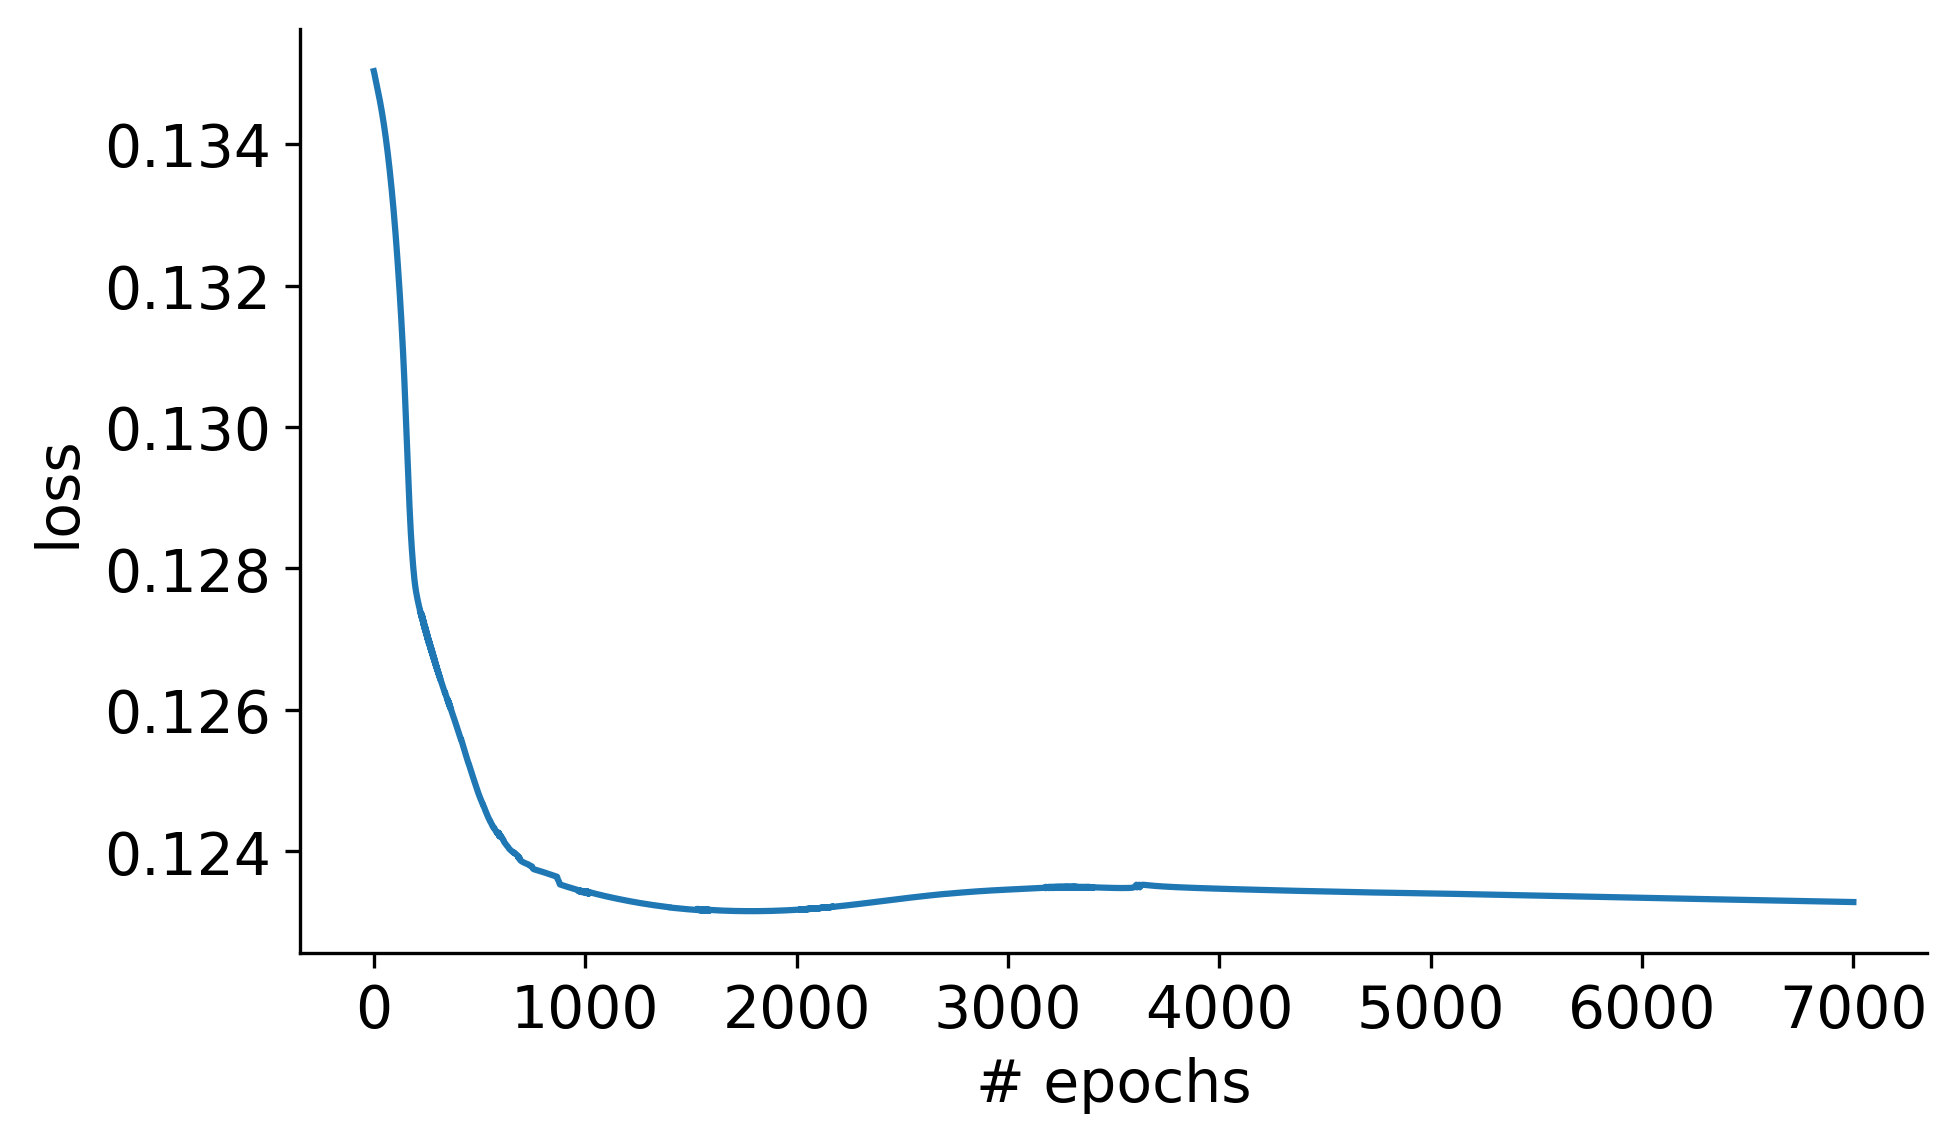

In [4]:
lr = 1
batch_size = 12
dataloader = make_dataloader(E, batch_size=batch_size)
scores = train_model(model, dataloader, lr=lr, epochs=7000, print_every=200)
plot_loss(scores)

### Plotting predicted and actual values

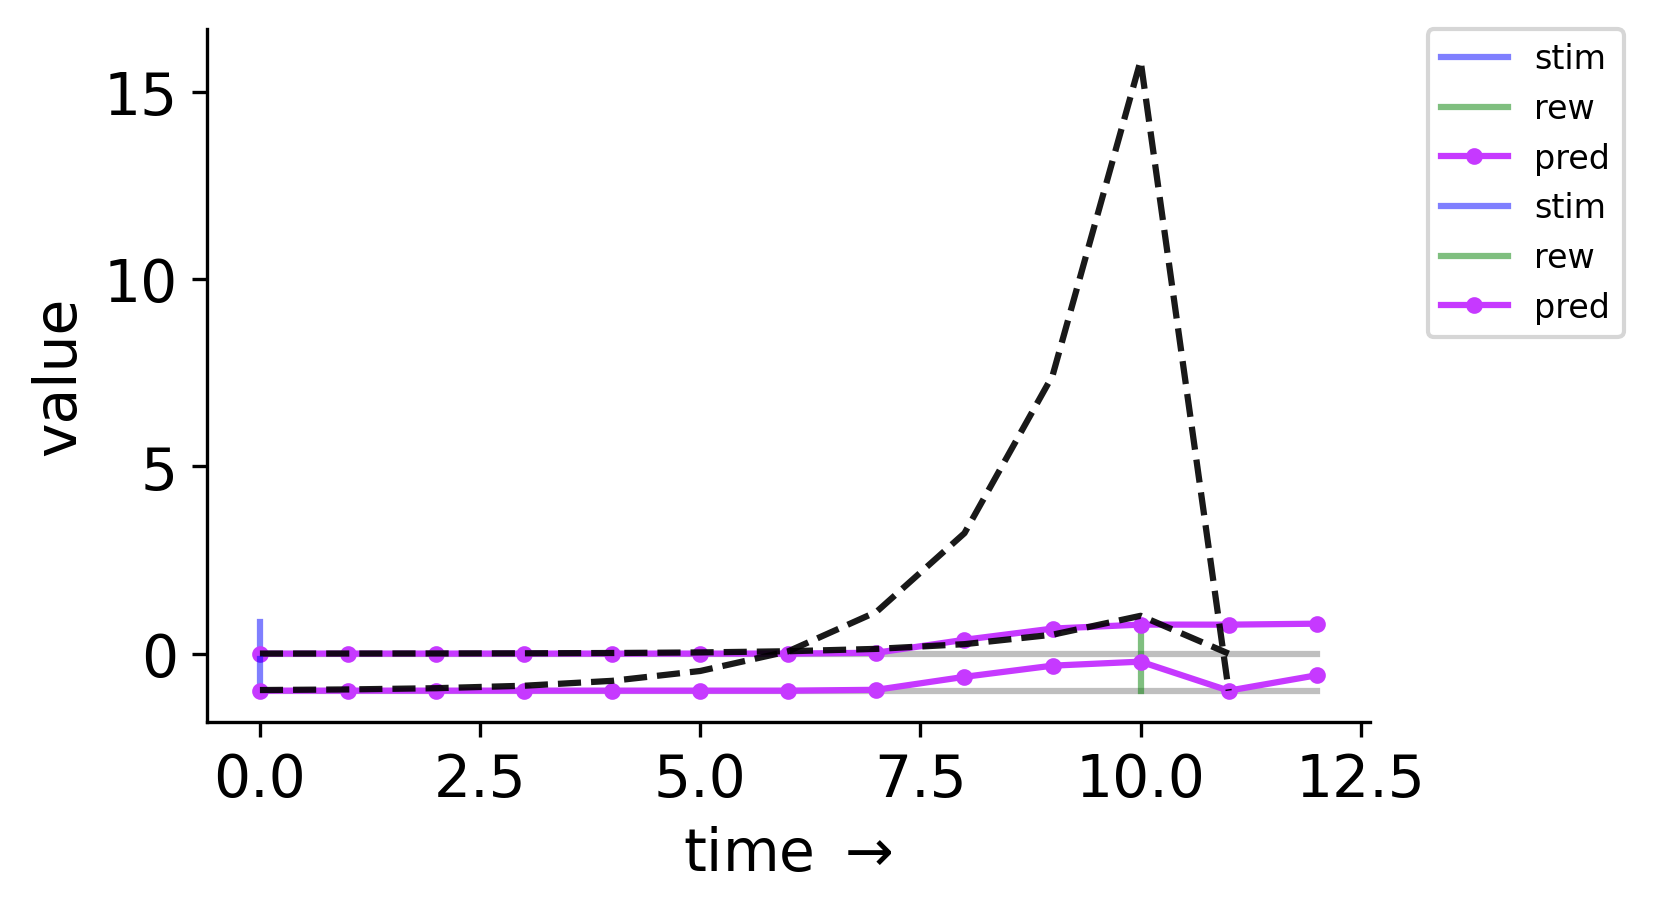

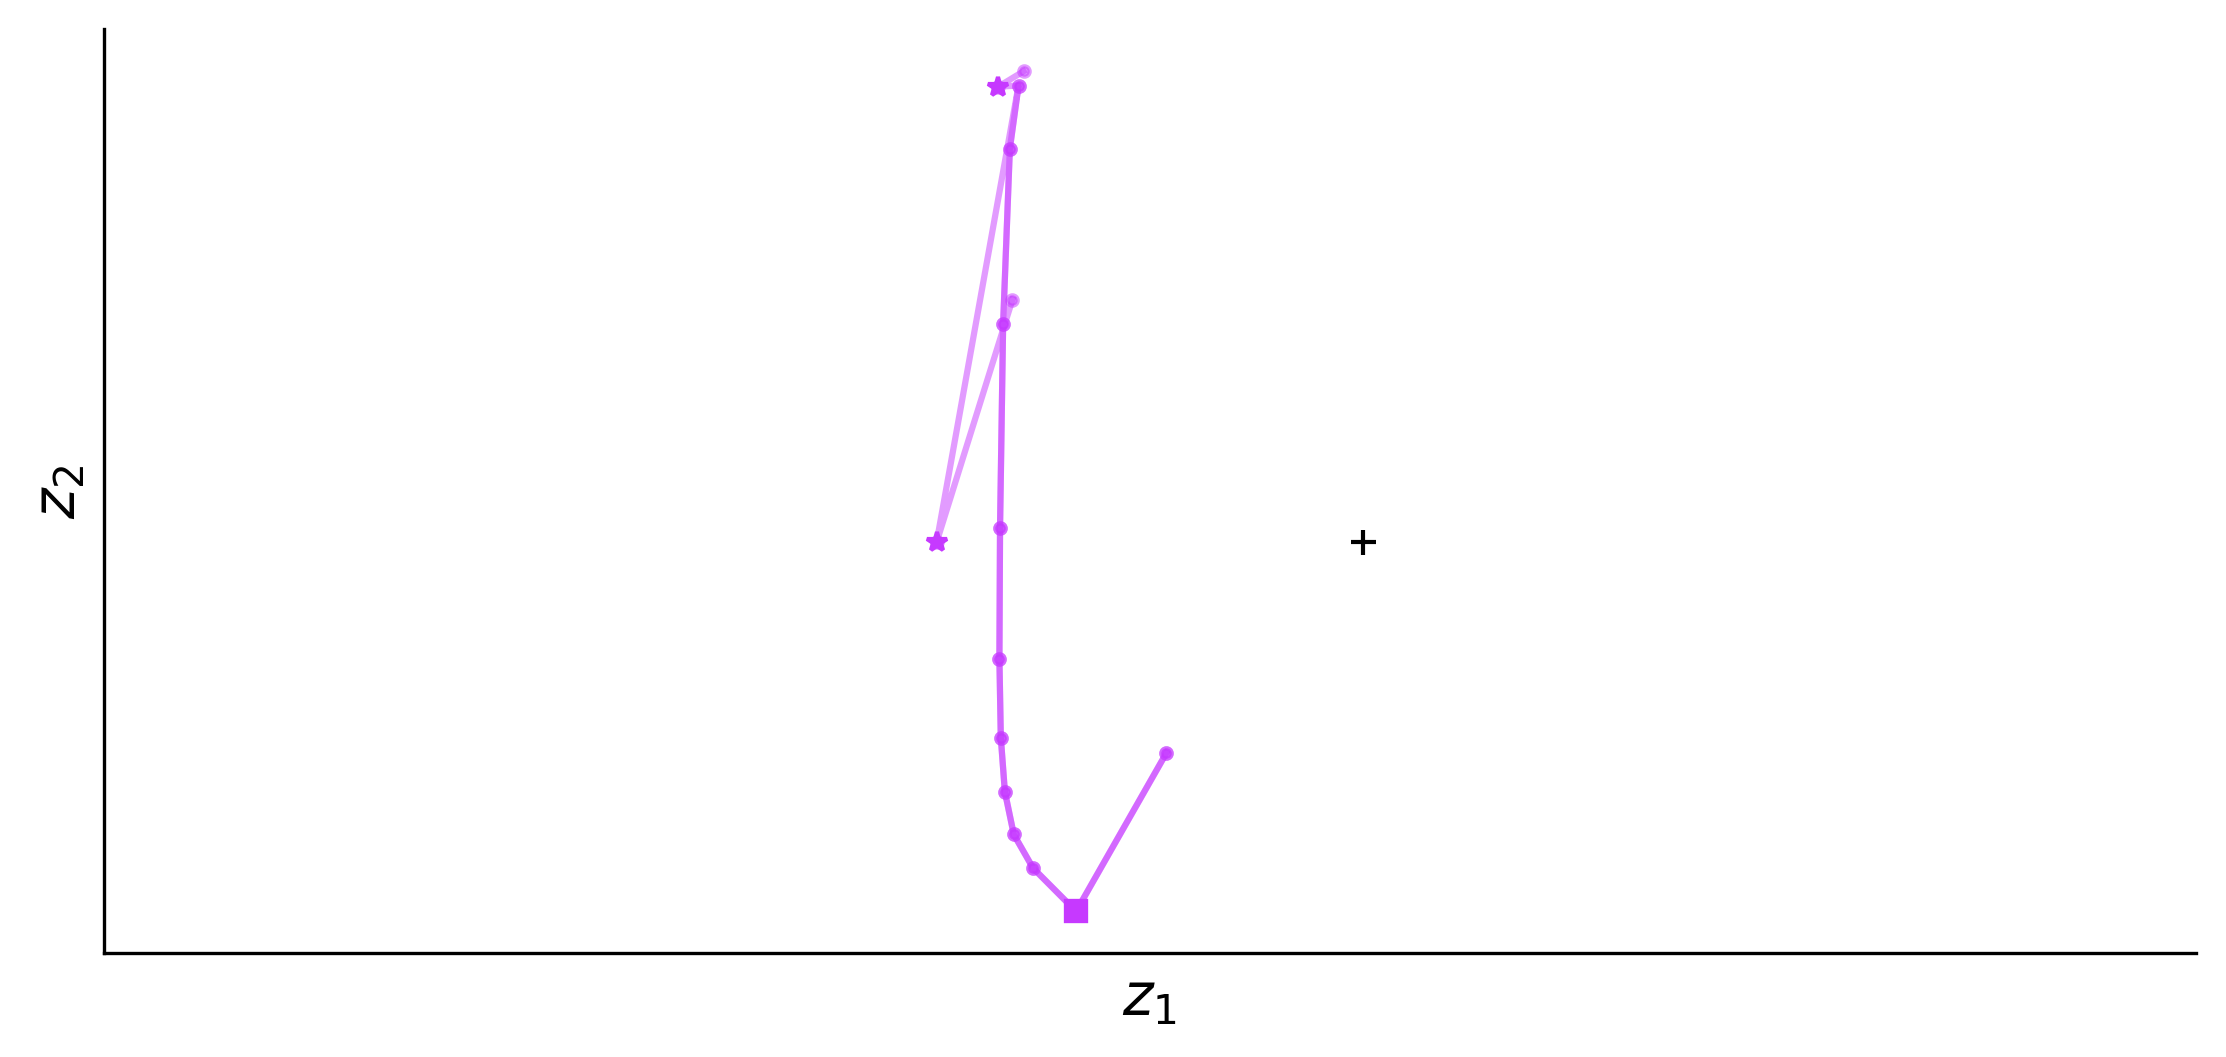

In [5]:
responses = probe_model(model, dataloader)
plot_predictions(responses[:2], 'value', gamma=model.gamma)
plot_hidden_activity(responses[:2])